# 00. Table of Contents
### 01. Importing Libraries & Dataframes
### 02. Check Imported Dataframe
### 03. Create Bar Chart
### 04. Create Histogram
### 05. Create Scatterplot
### 06. Create Sample data
### 07. Create Line Chart

# 01. Importing Libraries & Dataframes

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'C:\Users\krist\22.01.2024 Instacart Basket Analysis'

In [3]:
# Import last dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))


# 02. Check Imported Dataframe

In [4]:
# Check Shape
ords_prods_merge.shape

(32404859, 22)

In [5]:
# Check columns and data types
ords_prods_merge.dtypes

order_id                          object
user_id                           object
order_number                       int64
order_day_of_week                  int64
order_hour_of_day                  int64
days_since_prior_order           float64
product_id                        object
add_to_cart_order                  int64
reordered                          int64
product_name                      object
aisle_id                          object
department_id                     object
prices                           float64
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
mean_product_price               float64
spending_flag                     object
median_days_since_prior_order    float64
order_frequency_flag              object
dtype: object

# 03. Create Bar Chart

In [6]:
# Check outcome of first part of command
ords_prods_merge['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='order_day_of_week'>

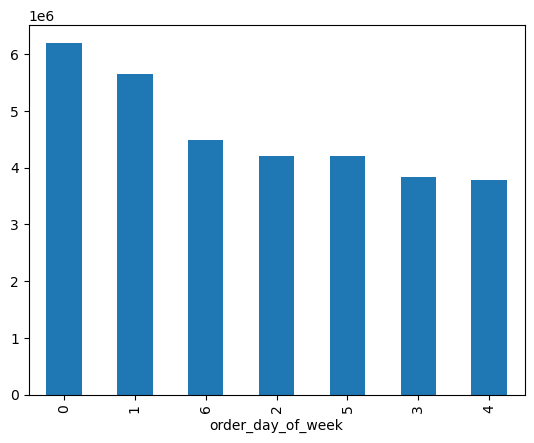

In [7]:
# Create Bar Char on order_day_of_week
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='order_day_of_week'>

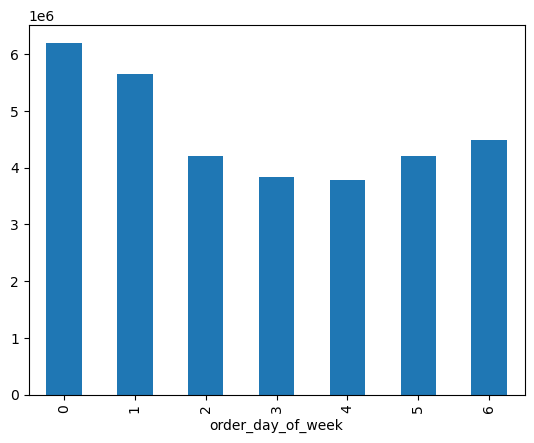

In [14]:
# Sort bar chart by index
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

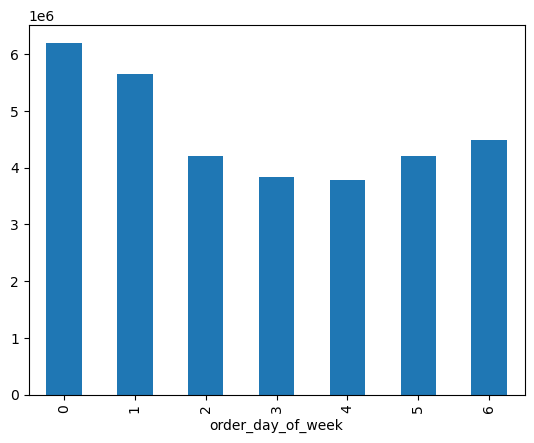

In [9]:
# Save bar chart blue
bar_1 = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

In [16]:
# Add title and axes labels
bar_1.set_title("Distribution of orders by day of week")
bar_1.set_xlabel("order day of week")
bar_1.set_ylabel("number of orders")

Text(55.847222222222214, 0.5, 'number of orders')

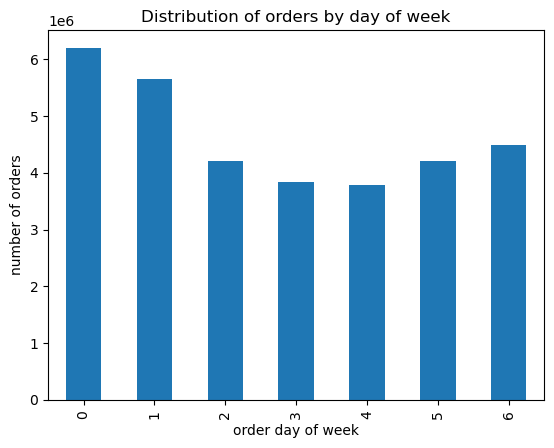

In [17]:
# Call back bar within jupyter
bar_1.figure

In [18]:
# Export bar chart blue
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_1.png'))

<Axes: xlabel='order_day_of_week'>

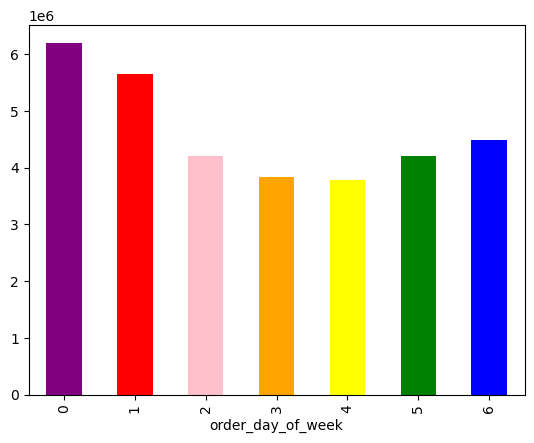

In [19]:
# Color bar chart (american spelling!)
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

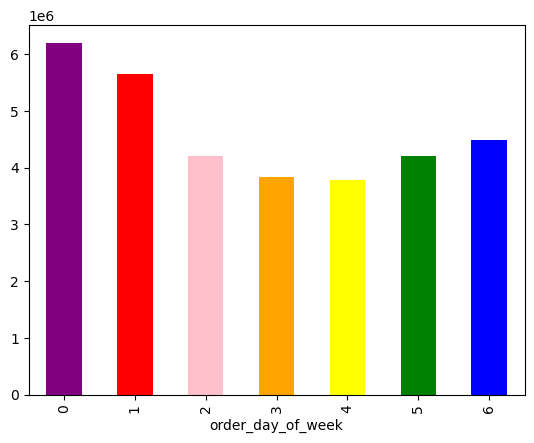

In [20]:
# Save bar chart in jupyter's memory
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

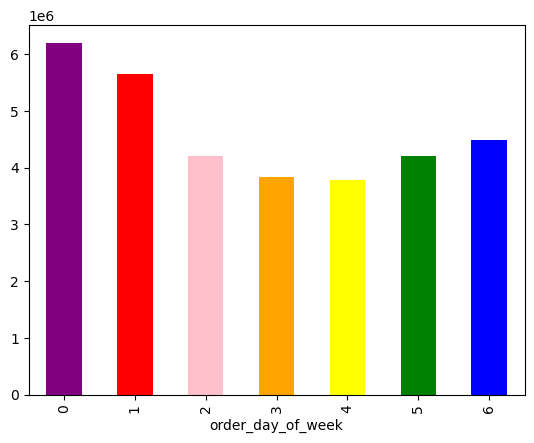

In [21]:
# Call back bar within jupyter
bar.figure

In [22]:
# Export bar chart as image file
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_orders_dow.png'))

# 04. Create Histogram

<Axes: ylabel='Frequency'>

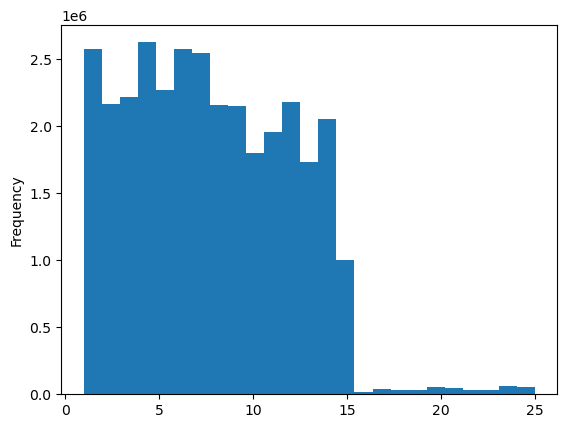

In [23]:
# Create histogram of the 'prices' column
ords_prods_merge['prices'].plot.hist(bins=25)

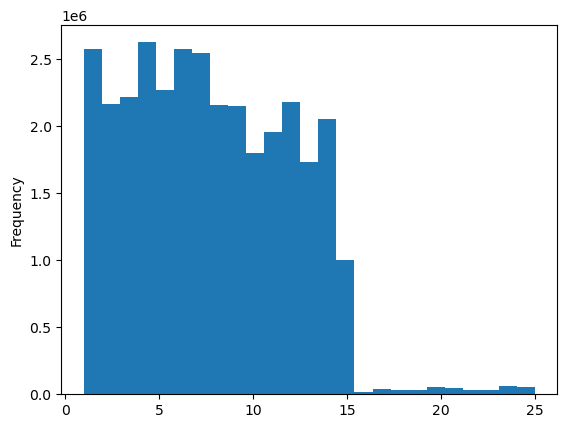

In [24]:
# Save histogram 25
hist_1 = ords_prods_merge['prices'].plot.hist(bins=25)

In [25]:
# Add title and axes labels
hist_1.set_title("Frequency of prices in orders")
hist_1.set_xlabel("product price")
hist_1.set_ylabel("frequency")

Text(24.000000000000007, 0.5, 'frequency')

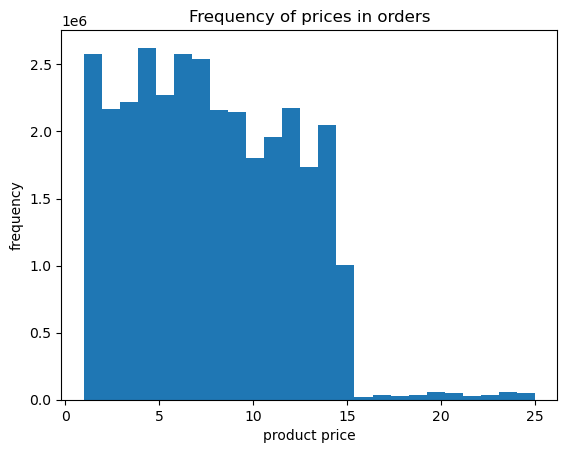

In [26]:
# Call back hist_1 within jupyter
hist_1.figure

In [27]:
# Export as image
hist_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'histogram_prices_25.png'))

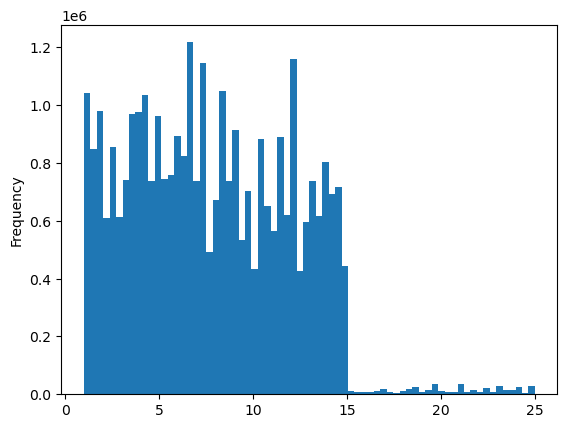

In [28]:
# Increase number of bins in histogram
hist_2 = ords_prods_merge['prices'].plot.hist(bins=70)

In [30]:
# Add title and axes labels
hist_2.set_title("Frequency of prices in orders")
hist_2.set_xlabel("product price")
hist_2.set_ylabel("frequency")

Text(24.000000000000007, 0.5, 'frequency')

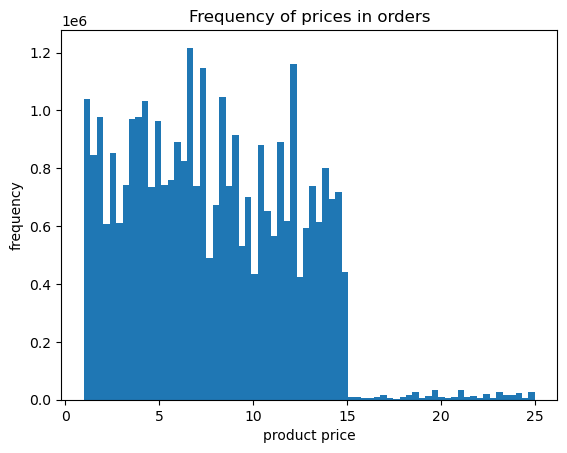

In [31]:
# Call back hist_2 within jupyter
hist_2.figure

In [32]:
# Export as image
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_2.png'))

# 05. Create Scatterplot

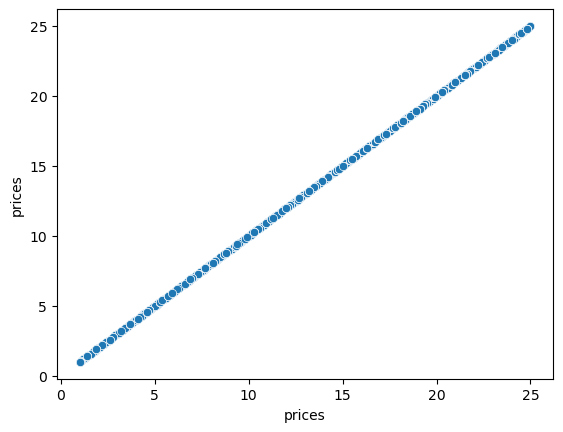

In [33]:
# Create Scatterplot for prices column
scatterplot_1 = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [34]:
# Add title and axis labels
scatterplot_1.set_title("Distribution of price")
scatterplot_1.set_xlabel("product price")
scatterplot_1.set_ylabel("product price")

Text(24.000000000000007, 0.5, 'product price')

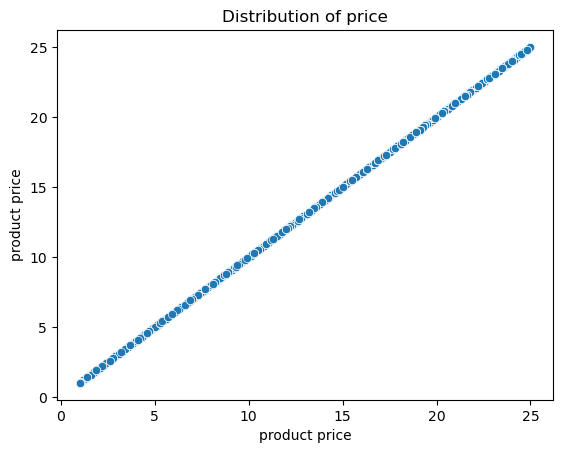

In [35]:
# Call back hist_2 within jupyter
scatterplot_1.figure

In [36]:
# Export as image
scatterplot_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatterplot_prices.png'))

In [32]:
# Issue with extraordinary high prices was already fixed before. Exercise option is turning them to missing values
ords_prods_merge.loc[ords_prods_merge['prices']>100, 'prices'] = np.nan

In [37]:
ords_prods_merge['prices'].max()

25.0

# 06. Create Sample data

In [38]:
# Create sample data with a 70/30 split. Choose seed '4'. 
# Create new list called 'dev' with values between 0 and 1 for the entire length of the dataframe aka 32435059 rows
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge))<=0.7

In [39]:
# Store 70% of the sample in the dataframe 'big'
big = ords_prods_merge[dev]

In [40]:
# Store 30% of the sample in the dataframe 'small'
small = ords_prods_merge[~dev]

In [41]:
# Check samples against entire dataframe
len(ords_prods_merge)

32404859

In [42]:
len(big) + len(small)

32404859

In [43]:
# Create subset of only the necessary columns for the line chart out of the small sample
df_2 = small[['order_day_of_week', 'prices']]

# 07. Create Line Chart

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


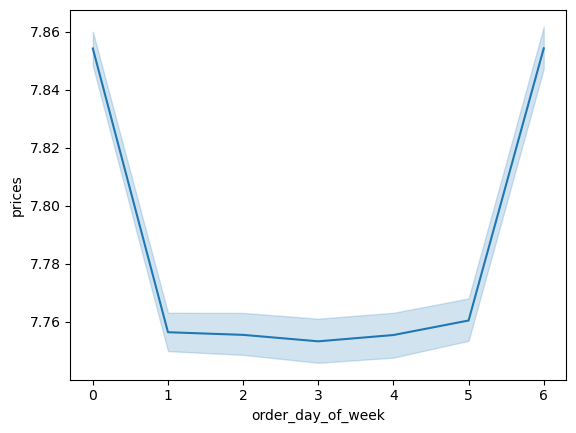

In [44]:
# Create line chart on small sample data
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [45]:
# Add title and axis labels
line.set_title("Product price by day of the week")
line.set_xlabel("day of the week")
line.set_ylabel("product price")

Text(24.000000000000007, 0.5, 'product price')

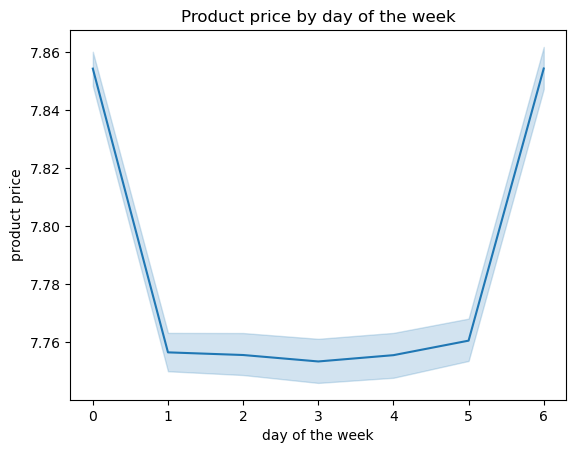

In [46]:
# Call back line within jupyter
line.figure

In [47]:
# Export line chart as image file
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_3.png'))